In [40]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import bioframe as bf
import matplotlib as mpl

In [32]:
! pwd

/project/bigdata_aktas/NS_paper/2025_Cell_resubmission/STARcode/SON_Halo_SRRM2_dTag_4sU/scripts


In [33]:
# load count table (output from DESeq2 analysis)

counts_SONdepl = pd.read_csv('../data/resLFC_SONdepl_vs_control.csv').rename(columns={'Unnamed: 0':'geneID'})
counts_SRRM2depl = pd.read_csv('../data/resLFC_SRRM2depl_vs_control.csv').rename(columns={'Unnamed: 0':'geneID'})
counts_doubledepl = pd.read_csv('../data/resLFC_Doubledepl_vs_control.csv').rename(columns={'Unnamed: 0':'geneID'})
counts_doubledepl

,geneID,baseMean,log2FoldChange,lfcSE,pvalue,padj
0,ENSG00000227232.5,95.018530,-0.151384,0.232120,0.073151,0.320260
1,ENSG00000238009.6,108.497104,-0.066555,0.163442,0.349083,0.689301
2,ENSG00000233750.3,4.969758,0.033722,0.171618,0.027557,NaN
3,ENSG00000268903.1,2.521766,-0.006486,0.166609,0.628268,NaN
4,ENSG00000269981.1,5.587062,0.005780,0.165900,0.774739,NaN
...,...,...,...,...,...,...
21600,ENSG00000155962.12,129.069793,-0.925872,0.345300,0.000307,0.008449
21601,ENSG00000224216.1,30.123085,-0.030172,0.164528,0.489785,0.790251
21602,ENSG00000185973.10,209.548423,0.046703,0.143553,0.559440,0.827609
21603,ENSG00000099715.14,22.619690,0.009403,0.162631,0.808830,NaN


## Double depletion vs Control


In [34]:
#prepare data for plotting

lfc_threshold = 1
padj_threshold = 0.05 

counts_doubledepl['Status'] = ''

# Iterate over each row and set the 'status' column
for index, row in counts_doubledepl.iterrows():
    if row['log2FoldChange'] > 1 and row['padj'] < 0.05:
        counts_doubledepl.at[index, 'Status'] = 'UP'
    elif row['log2FoldChange'] < -1 and row['padj'] < 0.05:
        counts_doubledepl.at[index, 'Status'] = 'DOWN'
    else:
        counts_doubledepl.at[index, 'Status'] = 'NONSIGNIFICANT'

counts_doubledepl["log_padj"] = -np.log(counts_doubledepl["padj"])

counts_doubledepl


,geneID,baseMean,log2FoldChange,lfcSE,pvalue,padj,Status,log_padj
0,ENSG00000227232.5,95.018530,-0.151384,0.232120,0.073151,0.320260,NONSIGNIFICANT,1.138621
1,ENSG00000238009.6,108.497104,-0.066555,0.163442,0.349083,0.689301,NONSIGNIFICANT,0.372077
2,ENSG00000233750.3,4.969758,0.033722,0.171618,0.027557,NaN,NONSIGNIFICANT,NaN
3,ENSG00000268903.1,2.521766,-0.006486,0.166609,0.628268,NaN,NONSIGNIFICANT,NaN
4,ENSG00000269981.1,5.587062,0.005780,0.165900,0.774739,NaN,NONSIGNIFICANT,NaN
...,...,...,...,...,...,...,...,...
21600,ENSG00000155962.12,129.069793,-0.925872,0.345300,0.000307,0.008449,NONSIGNIFICANT,4.773655
21601,ENSG00000224216.1,30.123085,-0.030172,0.164528,0.489785,0.790251,NONSIGNIFICANT,0.235404
21602,ENSG00000185973.10,209.548423,0.046703,0.143553,0.559440,0.827609,NONSIGNIFICANT,0.189215
21603,ENSG00000099715.14,22.619690,0.009403,0.162631,0.808830,NaN,NONSIGNIFICANT,NaN


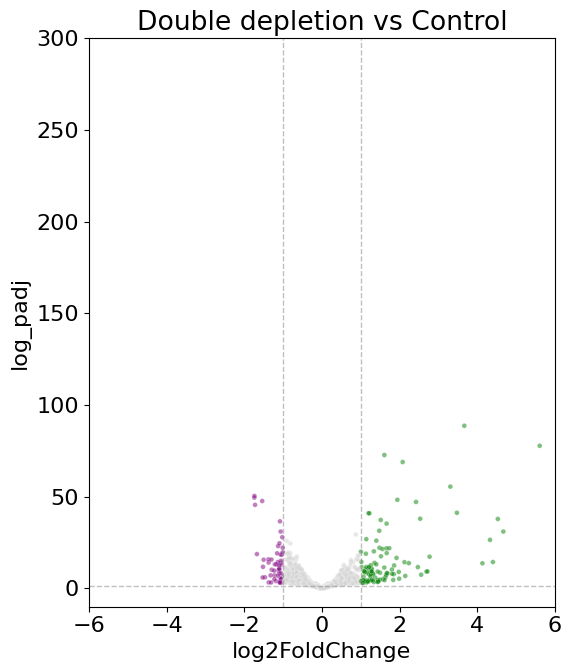

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,7), sharex=True, sharey=True)

ax1 = sns.scatterplot(counts_doubledepl.dropna(),  
                      x='log2FoldChange', 
                      y='log_padj', 
                      s=12, 
                      hue='Status', 
                      palette={'UP':'green', 'DOWN':'purple', 'NONSIGNIFICANT':'lightgray'}, 
                      alpha=0.5,
                      legend=False, 
                      rasterized=True)

ax1.set(ylim=(-10, 300))
ax1.set(xlim=(-6, 6))
ax1.set_title('Double depletion vs Control')

ax1.axvline(x=1, linewidth=1, color='grey', ls='--', alpha=0.5)
ax1.axvline(x=-1, linewidth=1, color='grey', ls='--', alpha=0.5)
ax1.axhline(y=-np.log10(0.05), linewidth=1, color='gray', ls='--', alpha=0.5)

plt.rcParams["font.size"] = 16
plt.rcParams['pdf.fonttype'] = 42
plt.tight_layout()

## SON depletion vs Control

In [36]:
#prepare data for plotting

lfc_threshold = 1
padj_threshold = 0.05 

counts_SONdepl['Status'] = ''

# Iterate over each row and set the 'status' column
for index, row in counts_SONdepl.iterrows():
    if row['log2FoldChange'] > 1 and row['padj'] < 0.05:
        counts_SONdepl.at[index, 'Status'] = 'UP'
    elif row['log2FoldChange'] < -1 and row['padj'] < 0.05:
        counts_SONdepl.at[index, 'Status'] = 'DOWN'
    else:
        counts_SONdepl.at[index, 'Status'] = 'NONSIGNIFICANT'

counts_SONdepl["log_padj"] = -np.log(counts_SONdepl["padj"])

counts_SONdepl


,geneID,baseMean,log2FoldChange,lfcSE,pvalue,padj,Status,log_padj
0,ENSG00000227232.5,95.018530,-0.151384,0.232120,0.073151,0.320260,NONSIGNIFICANT,1.138621
1,ENSG00000238009.6,108.497104,-0.066555,0.163442,0.349083,0.689301,NONSIGNIFICANT,0.372077
2,ENSG00000233750.3,4.969758,0.033722,0.171618,0.027557,NaN,NONSIGNIFICANT,NaN
3,ENSG00000268903.1,2.521766,-0.006486,0.166609,0.628268,NaN,NONSIGNIFICANT,NaN
4,ENSG00000269981.1,5.587062,0.005780,0.165900,0.774739,NaN,NONSIGNIFICANT,NaN
...,...,...,...,...,...,...,...,...
21600,ENSG00000155962.12,129.069793,-0.925872,0.345300,0.000307,0.008449,NONSIGNIFICANT,4.773655
21601,ENSG00000224216.1,30.123085,-0.030172,0.164528,0.489785,0.790251,NONSIGNIFICANT,0.235404
21602,ENSG00000185973.10,209.548423,0.046703,0.143553,0.559440,0.827609,NONSIGNIFICANT,0.189215
21603,ENSG00000099715.14,22.619690,0.009403,0.162631,0.808830,NaN,NONSIGNIFICANT,NaN


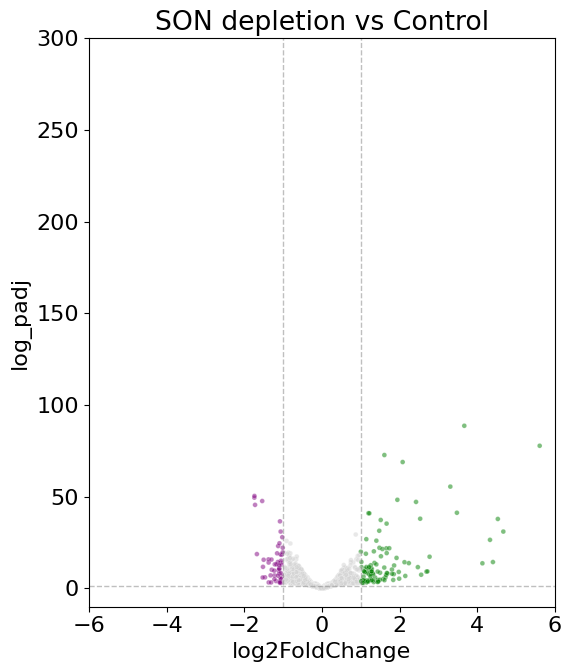

In [37]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,7), sharex=True, sharey=True)

ax1 = sns.scatterplot(counts_SONdepl.dropna(),  
                      x='log2FoldChange', 
                      y='log_padj', 
                      s=12, 
                      hue='Status', 
                      palette={'UP':'green', 'DOWN':'purple', 'NONSIGNIFICANT':'lightgray'}, 
                      alpha=0.5,
                      legend=False, 
                      rasterized=True)

ax1.set(ylim=(-10, 300))
ax1.set(xlim=(-6, 6))
ax1.set_title('SON depletion vs Control')

ax1.axvline(x=1, linewidth=1, color='grey', ls='--', alpha=0.5)
ax1.axvline(x=-1, linewidth=1, color='grey', ls='--', alpha=0.5)
ax1.axhline(y=-np.log10(0.05), linewidth=1, color='gray', ls='--', alpha=0.5)

plt.rcParams["font.size"] = 16
plt.rcParams['pdf.fonttype'] = 42
plt.tight_layout()

## SRRM2 depletion vs Control

In [38]:
#prepare data for plotting

lfc_threshold = 1
padj_threshold = 0.05 

counts_SRRM2depl['Status'] = ''

# Iterate over each row and set the 'status' column
for index, row in counts_SRRM2depl.iterrows():
    if row['log2FoldChange'] > 1 and row['padj'] < 0.05:
        counts_SRRM2depl.at[index, 'Status'] = 'UP'
    elif row['log2FoldChange'] < -1 and row['padj'] < 0.05:
        counts_SRRM2depl.at[index, 'Status'] = 'DOWN'
    else:
        counts_SRRM2depl.at[index, 'Status'] = 'NONSIGNIFICANT'

counts_SRRM2depl["log_padj"] = -np.log(counts_SRRM2depl["padj"])

counts_SRRM2depl


,geneID,baseMean,log2FoldChange,lfcSE,pvalue,padj,Status,log_padj
0,ENSG00000227232.5,105.832507,-0.075258,0.145868,0.111161,0.431942,NONSIGNIFICANT,0.839465
1,ENSG00000238009.6,124.083694,-0.017732,0.116679,0.681081,0.901369,NONSIGNIFICANT,0.103840
2,ENSG00000233750.3,7.140087,0.028687,0.128862,0.007860,NaN,NONSIGNIFICANT,NaN
3,ENSG00000268903.1,2.788936,-0.003684,0.123945,0.651545,NaN,NONSIGNIFICANT,NaN
4,ENSG00000269981.1,6.632050,0.006231,0.123764,0.611043,NaN,NONSIGNIFICANT,NaN
...,...,...,...,...,...,...,...,...
21657,ENSG00000185973.10,191.716092,-0.088727,0.143502,0.144896,0.491095,NONSIGNIFICANT,0.711119
21658,ENSG00000099715.14,21.533712,-0.005179,0.122451,0.803053,NaN,NONSIGNIFICANT,NaN
21659,ENSG00000099725.14,3.958808,0.004552,0.123952,0.607659,NaN,NONSIGNIFICANT,NaN
21660,ENSG00000235981.2,2.500397,0.002635,0.123967,0.718233,NaN,NONSIGNIFICANT,NaN


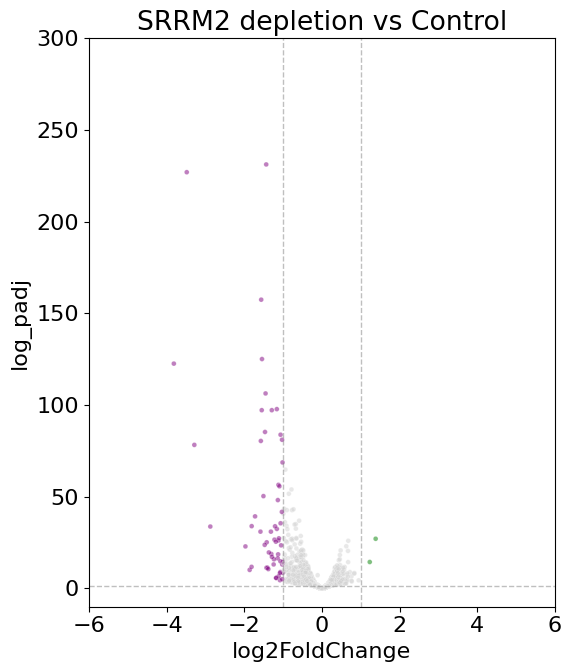

In [39]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6,7), sharex=True, sharey=True)

ax1 = sns.scatterplot(counts_SRRM2depl.dropna(),  
                      x='log2FoldChange', 
                      y='log_padj', 
                      s=12, 
                      hue='Status', 
                      palette={'UP':'green', 'DOWN':'purple', 'NONSIGNIFICANT':'lightgray'}, 
                      alpha=0.5,
                      legend=False, 
                      rasterized=True)

ax1.set(ylim=(-10, 300))
ax1.set(xlim=(-6, 6))
ax1.set_title('SRRM2 depletion vs Control')

ax1.axvline(x=1, linewidth=1, color='grey', ls='--', alpha=0.5)
ax1.axvline(x=-1, linewidth=1, color='grey', ls='--', alpha=0.5)
ax1.axhline(y=-np.log10(0.05), linewidth=1, color='gray', ls='--', alpha=0.5)

plt.rcParams["font.size"] = 16
plt.rcParams['pdf.fonttype'] = 42
plt.tight_layout()

## Radial plot double depletion vs control

In [41]:
# Load TSA-seq data. These are processed files from the Belmont lab.

son_tsa_seq_rep1 = "../../shared/4DNFI8HIU45G.bw"
son_tsa_seq_rep2 = "../../shared/4DNFIBY8G6RZ.bw"

In [ ]:
# bioframe has functions which can be used to get chromosome names and sizes etc

hg38 = bf.assembly_info("hg38")

#hg38.chromnames, hg38.chromsizes

In [44]:
#import the bigWig into a DataFrame

son_tsa_seq_rep1_bf = pd.concat([bf.read_bigwig(son_tsa_seq_rep1, chrom, engine='pyBigWig') for chrom in hg38.chromnames[:24]], axis=0)
son_tsa_seq_rep2_bf = pd.concat([bf.read_bigwig(son_tsa_seq_rep2, chrom, engine='pyBigWig') for chrom in hg38.chromnames[:24]], axis=0)
son_tsa_seq_rep1_bf

,chrom,start,end,value
0,chr1,9999,29999,1.172047
1,chr1,29999,49999,0.965637
2,chr1,49999,69999,0.477285
3,chr1,69999,89999,0.261049
4,chr1,89999,109999,0.625390
...,...,...,...,...
2856,chrY,57129999,57149999,0.266407
2857,chrY,57149999,57169999,0.311495
2858,chrY,57169999,57189999,0.514128
2859,chrY,57189999,57209999,0.960278


In [ ]:
# For some of the plots, we need the coordinates of protein coding genes
# We can import the GTF and turn them into a dataframe

def process_attribs(attribs):
    new_attribs = {}
    attribs = list(filter(None, attribs.split(';'))) #removes empty strings, needed because some gff3 lines have ";;"
    attribs = [x.strip() for x in attribs] #removing spaces at the beginning
    for attrib in attribs:
        k, v = attrib.split(' ')
        new_attribs[k] = v.strip('"')
    return new_attribs

def get_name(row):
    attributes = process_attribs(row['attributes'])
    return attributes['gene_id']

def get_type(row):
    attributes = process_attribs(row['attributes'])
    return attributes['gene_type']

def strip_gene_id(row, gene_id_column):
    return row[gene_id_column].split('.')[0]

genes_path='path-to-your/genes.gtf'
gencodev29 = bf.read_table(genes_path,
                           schema='gtf',
                           comment='#')


In [ ]:
#filter for genes only

gencodev29 = gencodev29[gencodev29['feature'] == 'gene']


In [ ]:
#reformat the columns

gencodev29['name'] = gencodev29.apply(lambda row: get_name(row), axis=1)
gencodev29['type'] = gencodev29.apply(lambda row: get_type(row), axis=1)
gencodev29

,chrom,source,feature,start,end,score,strand,frame,attributes,name,type
0,chr1,HAVANA,gene,11869,14409,.,+,.,"gene_id ""ENSG00000223972.5""; gene_type ""transc...",ENSG00000223972.5,transcribed_unprocessed_pseudogene
12,chr1,HAVANA,gene,14404,29570,.,-,.,"gene_id ""ENSG00000227232.5""; gene_type ""unproc...",ENSG00000227232.5,unprocessed_pseudogene
25,chr1,ENSEMBL,gene,17369,17436,.,-,.,"gene_id ""ENSG00000278267.1""; gene_type ""miRNA""...",ENSG00000278267.1,miRNA
28,chr1,HAVANA,gene,29554,31109,.,+,.,"gene_id ""ENSG00000243485.5""; gene_type ""lincRN...",ENSG00000243485.5,lincRNA
36,chr1,ENSEMBL,gene,30366,30503,.,+,.,"gene_id ""ENSG00000284332.1""; gene_type ""miRNA""...",ENSG00000284332.1,miRNA
...,...,...,...,...,...,...,...,...,...,...,...
2742636,KI270734.1,ENSEMBL,gene,72411,74814,.,+,.,"gene_id ""ENSG00000276017.1""; gene_type ""protei...",ENSG00000276017.1,protein_coding
2742643,KI270734.1,ENSEMBL,gene,131494,137392,.,+,.,"gene_id ""ENSG00000278817.1""; gene_type ""protei...",ENSG00000278817.1,protein_coding
2742659,KI270734.1,ENSEMBL,gene,138082,161852,.,-,.,"gene_id ""ENSG00000277196.4""; gene_type ""protei...",ENSG00000277196.4,protein_coding
2742728,KI270744.1,ENSEMBL,gene,51009,51114,.,-,.,"gene_id ""ENSG00000278625.1""; gene_type ""snRNA""...",ENSG00000278625.1,snRNA


In [48]:
#filter for protein coding genes

gencodev29 = gencodev29[(gencodev29['type'] == 'protein_coding')]

In [49]:
def add_speckle_distance(df, exponent=-1):
    df_copy = df.copy()

    #The ENSEMBL IDs are stored in the index, we just make a copy of them 
    #and store them in the new column 'name' 
    df_copy['name'] = df_copy.index

    #This removes the dot at the number from ENSEMBL IDs: ENSG00000277836.1 -> ENSG00000277836
    #Necessary to compare when DEseq data is from other GTFs
    df_copy['name'] = df_copy.apply(lambda row: strip_gene_id(row, 'name'), axis=1)
    
    gencodev29_copy = gencodev29.copy()
    gencodev29_copy['name'] = gencodev29_copy.apply(lambda row: strip_gene_id(row, 'name'), axis=1)
    
    if 'log2FoldChange' in df_copy.columns:
        df_coordinates = pd.merge(gencodev29_copy,
             df_copy[['name', 'log2FoldChange', 'padj']],
             on='name',
             how='left'
            )
    else:
        df_coordinates = pd.merge(gencodev29_copy,
             df_copy,
             on='name',
             how='left'
            )
    
    overlap1 = bf.overlap(df_coordinates,son_tsa_seq_rep1_bf).groupby('name').mean('value_')
    overlap2 = bf.overlap(df_coordinates,son_tsa_seq_rep2_bf).groupby('name').mean('value_')

    df_coordinates = pd.merge(df_coordinates,
             overlap1[['value_']].rename(columns={'value_':'SON_TSA_rep1'}),
                                    how='left',
                                    on='name'
                                   )
    df_coordinates = pd.merge(df_coordinates,
             overlap2[['value_']].rename(columns={'value_':'SON_TSA_rep2'}),
                                    how='left',
                                    on='name'
                                   )

    #Calculate the average of two replicates
    df_coordinates['average_dist'] = (df_coordinates.SON_TSA_rep1 + df_coordinates.SON_TSA_rep2)/2

    #The signal we get from SON inversely correlates with distance to Speckles,
    #and follows an exponential decay function of the form e^(-k*signal).
    #For visualization purposes, we just use k=-1.
    
    df_coordinates['exp_SON_TSA_rep1'] = np.exp(exponent*df_coordinates.SON_TSA_rep1)
    df_coordinates['exp_SON_TSA_rep2'] = np.exp(exponent*df_coordinates.SON_TSA_rep2)
    df_coordinates['exp_average_dist'] = np.exp(exponent*df_coordinates.average_dist)
    
    return df_coordinates

In [51]:
# load count table (output from DESeq2 analysis)

counts_SONdepl = pd.read_csv('../data/resLFC_SONdepl_vs_control.csv', index_col=0)
counts_SRRM2depl = pd.read_csv('../data/resLFC_SRRM2depl_vs_control.csv', index_col=0)
counts_doubledepl = pd.read_csv('../data/resLFC_Doubledepl_vs_control.csv', index_col=0)
counts_doubledepl

,baseMean,log2FoldChange,lfcSE,pvalue,padj
ENSG00000227232.5,95.018530,-0.151384,0.232120,0.073151,0.320260
ENSG00000238009.6,108.497104,-0.066555,0.163442,0.349083,0.689301
ENSG00000233750.3,4.969758,0.033722,0.171618,0.027557,NaN
ENSG00000268903.1,2.521766,-0.006486,0.166609,0.628268,NaN
ENSG00000269981.1,5.587062,0.005780,0.165900,0.774739,NaN
...,...,...,...,...,...
ENSG00000155962.12,129.069793,-0.925872,0.345300,0.000307,0.008449
ENSG00000224216.1,30.123085,-0.030172,0.164528,0.489785,0.790251
ENSG00000185973.10,209.548423,0.046703,0.143553,0.559440,0.827609
ENSG00000099715.14,22.619690,0.009403,0.162631,0.808830,NaN


In [52]:
double_deseq_distances = add_speckle_distance(counts_doubledepl)
son_deseq_distances = add_speckle_distance(counts_SONdepl)
srrm2_deseq_distances = add_speckle_distance(counts_SRRM2depl)

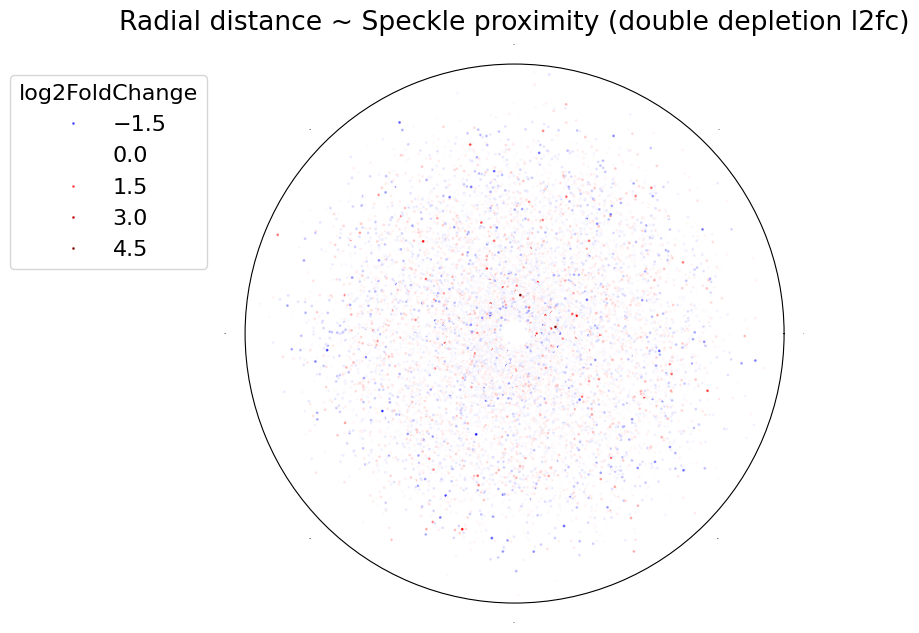

In [56]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=[7,7])

temp = double_deseq_distances.dropna()
rng = np.random.default_rng(seed=42)
theta = rng.random(len(temp))*2*np.pi

ax1=sns.scatterplot(x=theta, 
                y=temp.exp_average_dist,
                s=4,
                hue=temp.log2FoldChange,
                hue_norm=mpl.colors.TwoSlopeNorm(vmin=-4, vcenter=0,  vmax=4),
                palette='seismic'
               )
ax.set_rticks([])  
ax.grid(False)

ax.set_title("Radial distance ~ Speckle proximity (double depletion l2fc)", va='bottom')
ax.set_ylabel('')
ax.tick_params(labelsize=0, width=0)
sns.move_legend(ax, "upper right", bbox_to_anchor=(-0.05, 1))
ax.set_rmax(2)
plt.show()

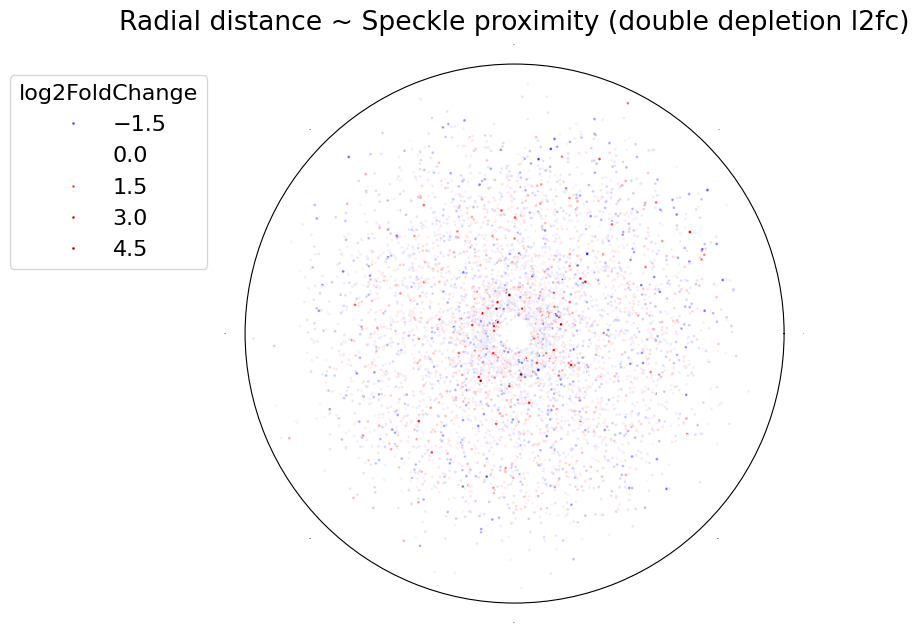

In [62]:
#to better visualize DE genes, one can filter based on log2FoldChange

double_deseq_distances_filtered = double_deseq_distances[double_deseq_distances['log2FoldChange'].abs() > 0.1]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=[7,7])

temp = double_deseq_distances_filtered.dropna()
rng = np.random.default_rng(seed=42)
theta = rng.random(len(temp))*2*np.pi

ax1=sns.scatterplot(x=theta, 
                y=temp.exp_average_dist,
                s=4,
                hue=temp.log2FoldChange,
                hue_norm=mpl.colors.TwoSlopeNorm(vmin=-4, vcenter=0,  vmax=4),
                palette='seismic'
               )
ax.set_rticks([])  
ax.grid(False)

ax.set_title("Radial distance ~ Speckle proximity (double depletion l2fc)", va='bottom')
ax.set_ylabel('')
ax.tick_params(labelsize=0, width=0)
sns.move_legend(ax, "upper right", bbox_to_anchor=(-0.05, 1))
ax.set_rmax(2)
plt.show()